# Confidence intervals in python

낮잠을 자는 유아와 낮잠을 자지 않는 유아 간의 다양한 수면 변수 차이를 조사한 연구 결과 데이터를 분석해보자.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import t


In [2]:
df = pd.read_csv("nap_no_nap.csv") 
pd.set_option('display.max_columns', 30)
df

,id,sex,age (months),dlmo time,days napped,napping,nap lights outl time,nap sleep onset,nap midsleep,nap sleep offset,nap wake time,nap duration,nap time in bed,night bedtime,night sleep onset,sleep onset latency,night midsleep time,night wake time,night sleep duration,night time in bed,24 h sleep duration,bedtime phase difference,sleep onset phase difference,midsleep phase difference,wake time phase difference
0,1,female,33.7,19.24,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.45,20.68,0.23,1.92,7.17,629.40,643.00,629.40,-1.21,-1.44,6.68,11.93
1,2,female,31.5,18.27,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.23,19.48,0.25,1.09,6.69,672.40,700.40,672.40,-0.96,-1.21,6.82,12.42
2,3,male,31.9,19.14,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.60,20.05,0.45,1.29,6.53,628.80,682.60,628.80,-0.46,-0.91,6.15,11.39
3,4,female,31.6,19.69,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.46,19.50,0.05,1.89,8.28,766.60,784.00,766.60,0.23,0.19,6.20,12.59
4,5,female,33.0,19.52,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.21,19.65,0.45,1.30,6.95,678.00,718.00,678.00,0.31,-0.13,5.78,11.43
5,6,female,36.2,18.22,4,1,14.00,14.22,15.00,15.78,16.28,93.75,137.00,19.95,20.25,0.29,1.26,6.28,602.20,653.80,695.95,-1.73,-2.03,7.05,12.06
6,7,male,36.3,19.28,1,1,14.75,15.03,15.92,16.80,16.08,106.00,80.00,20.60,20.96,0.36,2.12,7.27,618.40,655.40,724.40,-1.32,-1.68,6.84,11.99
7,8,male,30.0,21.06,5,1,13.09,13.43,14.44,15.46,15.82,121.60,163.80,22.01,22.53,0.51,2.92,7.31,526.80,582.40,648.40,-0.95,-1.47,5.86,10.25
8,9,male,33.2,19.38,2,1,14.41,14.42,15.71,17.01,16.60,155.50,131.25,20.24,20.37,0.13,1.60,6.82,626.80,660.33,782.30,-0.86,-0.99,6.22,11.44
9,10,female,37.1,19.93,3,1,13.12,13.42,14.31,15.19,15.30,106.67,130.67,20.78,21.63,0.84,2.20,6.52,549.50,626.00,656.17,-0.76,-1.82,6.21,10.59


sleep variables: Bedtime (lights-off time in decimalized time), Night Sleep Onset Time (in decimalized time), Wake Time (sleep end time in decimalized time), Night Sleep Duration (interval between sleep onset and sleep end in minutes), and Total 24-Hour Sleep Duration (in minutes).

### Average bedtime confidence interval for napping and non napping toddlers
낮잠을 자는 유아와 낮잠을 자지 않는 유아 평균 bedtime의 95% 신뢰구간을 만들어보자.

낮잠 자는 유아와 낮잠 자지 않는 유아의 bedtime 분리

In [3]:
bedtime_nap = df[df['napping']==1]['night bedtime']

In [4]:
bedtime_no_nap = df[df['napping']==0]['night bedtime']

1) mean

In [5]:
nap_mean_bedtime = np.mean(bedtime_nap)
nap_mean_bedtime

20.304

In [6]:
no_nap_mean_bedtime = np.mean(bedtime_no_nap)
no_nap_mean_bedtime

19.590000000000003

2) standard deviation

In [7]:
nap_s_bedtime = np.std(bedtime_nap, ddof=1)
nap_s_bedtime

0.5910619981984009

In [8]:
no_nap_s_bedtime = np.std(bedtime_no_nap, ddof=1)
no_nap_s_bedtime

0.5075923561284187

3) standard error

In [9]:
nap_se_mean_bedtime = nap_s_bedtime/np.sqrt(df[df['napping']==1].id.count())
nap_se_mean_bedtime

0.15261155170656565

In [10]:
no_nap_se_mean_bedtime = no_nap_s_bedtime/np.sqrt(df[df['napping']==0].id.count())
no_nap_se_mean_bedtime

0.22700220263248522

4) t-value

In [36]:
nap_t_star = t.ppf(.95, df=14)
no_nap_t_star = t.ppf(.95, df=4)
(nap_t_star, no_nap_t_star)

(1.7613101357748562, 2.13184678133629)

5) Confidence Interval = 'Best estimate' +- 'Margin of error'

In [12]:
# nap
nap_ci_ub = nap_mean_bedtime + ( nap_t_star * nap_se_mean_bedtime )
nap_ci_lb = nap_mean_bedtime - ( nap_t_star * nap_se_mean_bedtime )
(nap_ci_lb, nap_ci_ub)

(20.035203727142896, 20.5727962728571)

In [13]:
# no nap
no_nap_ci_ub = no_nap_mean_bedtime + ( no_nap_t_star * no_nap_se_mean_bedtime )
no_nap_ci_lb = no_nap_mean_bedtime - ( no_nap_t_star * no_nap_se_mean_bedtime )
(no_nap_ci_lb, no_nap_ci_ub)

(19.106066084961693, 20.073933915038314)

## Plotting

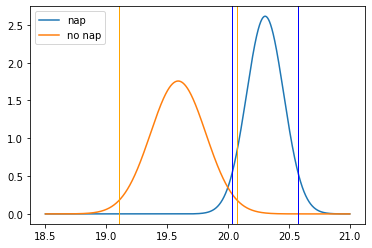

In [54]:
x_axis = np.arange(18.5, 21, 0.001)
y_nap = stats.norm.pdf(x_axis, nap_mean_bedtime, nap_se_mean_bedtime)
y_no_nap = stats.norm.pdf(x_axis, no_nap_mean_bedtime, no_nap_se_mean_bedtime)
plt.plot(x_axis, y_nap, label='nap')
plt.plot(x_axis, y_no_nap, label='no nap')
plt.legend()
plt.axvline(nap_ci_lb, color='blue', linewidth=1)
plt.axvline(nap_ci_ub, color='blue', linewidth=1)
plt.axvline(no_nap_ci_lb, color='orange', linewidth=1)
plt.axvline(no_nap_ci_ub, color='orange', linewidth=1)

# 해석

95% 신뢰도로, 낮잠을 자는 유아의 bedtime은 20.04 - 20.57로 추정된다.   
95% 신뢰도로, 낮잠을 자지 않는 유아의 bedtime은 19.11 - 20.07로 추정된다.   
   
두 신뢰 구간이 겹치는 부분이 있다.   
fail to reject null hypothesis   
두 그룹의 bedtime이 다르다고 주장할 수 없다.   